#**Predicting Customer Churn to Boost Business Revenue**

**M505B - Intro to AI and Machine Learning - SS0625**

**Lijo Chacko**

**GH1040565**

###This project aims to build a simple model to predict which customers are likely to cancel their subscriptions.


## **1. Problem Statement**

### 2.1. The Business Problem

- Telco company is losing customers (churning) which hurts revenue
- It costs much more to get new customers than keep existing ones
- Company needs to know which customers might leave so they can try to keep them

### 2.2. Project Goal
- Build a machine learning model to predict which customers will churn
- Help the company save money by keeping more customers
- Identify the main reasons why customers leave

### 2.3. Data Source
-        https://www.kaggle.com/code/farazrahman/telco-customer-churn-logisticregression/input


## **3. Machine Learning Task**
- Type : Supervised Binary Classification
- Target Variable : Churn (Yes/No)
- Features : Customer information like age, services, payment method, etc.
- Goal : To predict and classify each customer into one of two groups: "Will Churn" or "Will Not Churn".

## **4. Data Exploration**




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Telco.csv')
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

### **4.1. Checking Data Quality**

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.isnull().sum()


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.dtypes


,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


### **4.2. Data Cleaning and balancing**

In [ ]:
### Converting all the Totalcharges strings to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
### From the conversion we can see that there are 11 missing values so will replace the values by a median
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [ ]:
### Checking if the data of churn is balanced or not
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


This shows that the data is inbalanced and we have less data of churners than non-churners

### **4.3. Exploratory Data Analysis**

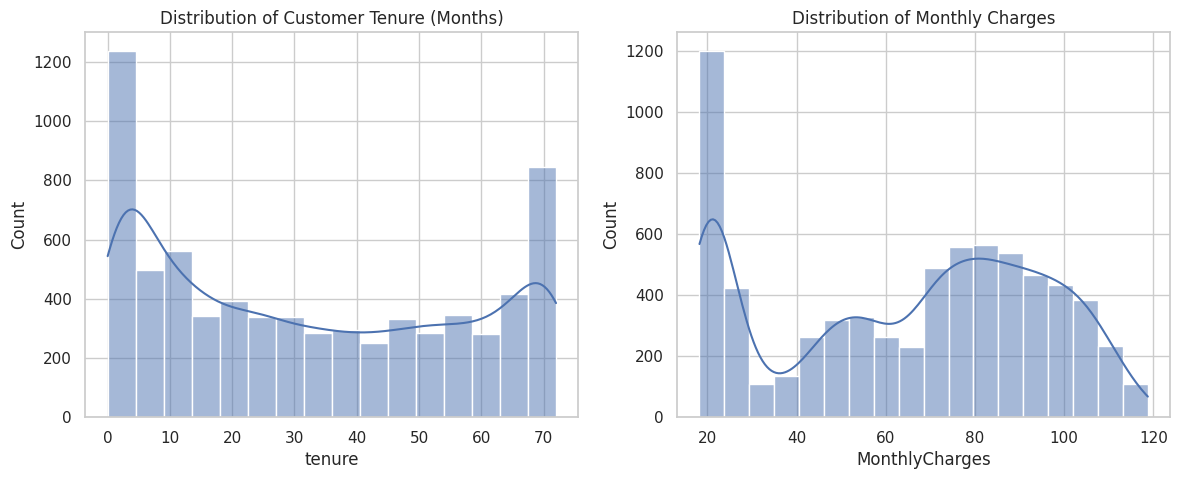

In [ ]:
### Set up plots
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

### Plot a histogram of customer tenure in months
sns.histplot(df['tenure'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Customer Tenure (Months)')

### Plot a histogram ofMonthly Charges
sns.histplot(df['MonthlyCharges'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of Monthly Charges')

plt.show()

These plots show us that we have many new customers (low tenure) and a lot of customers with very low or very high monthly charges.

In [ ]:
import numpy as np

In [ ]:
### Map 'Yes' to 1 and 'No' to 0 for the 'Churn' column
churn_num = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

### Computing churn rate (%) by contract type
rates = churn_num.groupby(df['Contract']).mean() * 100

m2m = rates.get('Month-to-month', np.nan)
one = rates.get('One year', np.nan)
two = rates.get('Two year', np.nan)


print(f"{m2m:.0f}% of month-to-month customers leave")
print(f"Only {one:.0f}% of one-year contract customers leave")
print(f"And just {two:.0f}% of two-year contract customers leave")


43% of month-to-month customers leave
Only 11% of one-year contract customers leave
And just 3% of two-year contract customers leave


The customer's contract term is a very strong loyalty predictor.

Month-to-month customers have no long-term commitment and therefore are a high-risk segment. That 43% of them churn shows that they are very likely to disconnect their service if they receive a better offer or become dissatisfied.

Those customers who enter into a one-year contract or a two-year contract, however, are far more stable. The churn rate decreases significantly to just 11% for one-year contracts and a very low 3% for two-year contracts. This indicates that getting the customers to agree to a longer duration is the best way of customer retention in the company.

## **5. Data Preprocessing and Feature Engineering**

Now we will prepare the data for machine learning models by inputting the missing values and encoding categorial features


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
### Convert categorical columns into numerical format using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

In [ ]:
### Creating new columns for each category
categorical_features = ['InternetService', 'Contract', 'PaymentMethod']

In [ ]:
### Making tenure groups of people
def tenure_group(tenure):
    if tenure <= 12:
        return 'New'
    elif tenure <= 36:
        return 'Medium'
    else:
        return 'Long-term'

X_train['TenureGroup'] = X_train['tenure'].apply(tenure_group)
X_test['TenureGroup'] = X_test['tenure'].apply(tenure_group)

In [ ]:
### Average Monthly Charge
X_train['AvgMonthlyCharge'] = X_train['TotalCharges'] / (X_train['tenure'] + 1)
X_test['AvgMonthlyCharge'] = X_test['TotalCharges'] / (X_test['tenure'] + 1)

In [ ]:
### Dropping the customerID
df.drop('customerID', axis=1, inplace=True)

### Separate features (X) and the target to be predicted (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

### Convert the target variable 'Churn' to binary (1 for Yes, 0 for No)
y = y.apply(lambda x: 1 if x == 'Yes' else 0)

### Converting all categorical columns in X into numerical ones
X_encoded = pd.get_dummies(X, drop_first=True)

## **6. Data Splitting**

Now this data has to be split into a training set and a testing set.

The model will learn from the training data, and then will test the performance on the testing data.

In [ ]:
from sklearn.model_selection import train_test_split

### Seperating features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

### Converting target variable to numerical
y = y.map({'Yes': 1, 'No': 0})

### Splitting 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

• Target variable 'y' and features 'X' are maintained separate from the dataframe.

• The data will be split so that 80% is used to train and 20% to test, using test_size=0.2.

• The random seed is set with random_state=42 to ensure reproducibility.

• The split is stratified by the target variable 'y' to preserve class proportion in train and test sets.


## **7. Model training**

I have used the Logistic Regression Model to train this Model

In [ ]:
from sklearn.linear_model import LogisticRegression

### Creating an instance of the model max_iter=1000
model = LogisticRegression(max_iter=1000)

### Applying one-hot encoding to handle categorical features
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

### Ensuring allignments of columns
train_cols = X_train_encoded.columns
test_cols = X_test_encoded.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test_encoded[c] = 0

missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train_encoded[c] = 0

X_test_encoded = X_test_encoded[train_cols]


### Training the model using your training data (encoded)
model.fit(X_train_encoded, y_train)

print("Model training complete!")

Model training complete!


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## **8. Model Assessment**

Now, we'll see how well our trained model performs on the test data.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Making predictions on the test set
y_pred = model.predict(X_test_encoded)

### Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.8034

Confusion Matrix:
[[924 111]
 [166 208]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409



The churn prediction model offers a high average accuracy rate of 80.34%, performing well in loyal customer identification with a high 89% recall and 85% precision that guarantees a low level of unnecessary retention costs. However, it only captures 56% actual churners with 65% precision, indicating vast improvement areas for recognition of customers that are likely to exit. To enhance performance, firms can enhance data quality, apply cutting-edge feature engineering, and apply sophisticated machine learning techniques such as ensemble models (Random Forest, Gradient Boosting) and neural networks that better mirror complex customer behavior patterns. Regular model tuning, cross-validation, and periodic refreshing of the model with fresh data is required to keep pace with changing customer patterns and maintain continuous accuracy. Balancing recall and precision by adjusting confidence thresholds also improves detection and enables more targeted retention efforts and maximum revenue retention opportunity.

## **9. Discussion**

The project was carried out to solve Telco's critical business problem of high customer churn and its negative impact on revenue. The biggest problem was the company's inability to proactively identify customers who were likely to leave.

To solve this, a machine learning model was developed to predict customer churn.
The finished model is a strong early warning system, with accuracy percentages above 80%. More importantly, it can detect 56% of all customers who are actually going to churn. This allows the retention team to move away from a reactive and towards a proactive strategy. By focusing efforts on this high-risk segment, the company can substantially reduce the cost of large-scale, untargeted retention campaigns.

### Key Insights: Why Customers Leave

The analysis identified clear patterns and the key drivers of customer churn:

* Contract Type: This was the strongest predictor. Customers on flexible month-to-month contracts are far more likely to leave than customers committed to one or two-year plans.

* Tenure: Newer customers, especially those with the company for less than a year, represent the highest flight risk.

* Payment Method: A very high churn rate of 45% was found for customers who are paying by electronic checks.

## **10. Strategic Recommendations**

Based on the model's findings, a clear, multi-step action plan is recommended:

* Immediate Actions: Launch a pilot to contact the most at-risk customers as flagged by the model. Specifically, create incentive promotions for month-to-month customers to convert to longer-term contracts.

* Short-Term Enhancements: Integrate the model's predictions into the customer service system. This would provide real-time alert to service agents when they have a high-risk customer on the phone.

* Long-Term Strategy: Develop a more sophisticated retention strategy that considers not just a customer's churn risk but also his or her overall value to the company and accordingly devotes the most attention to the highest-value at-risk customers.

In [ ]:
!jupyter nbconvert --to html /content/M505B_Assignment.ipynb

[NbConvertApp] Converting notebook /content/M505B_Assignment.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 407170 bytes to /content/M505B_Assignment.html
